Importação da biblioteca para plotar grafos


In [ ]:
import networkx as nx

Função de teste para plotar grafos coloridos aleatóriamente

In [ ]:
from random import *

def cria_grafo_colorido(quantidade_vertices):
  Grafo = nx.Graph()
  color_map = []
  
  #adiciona vertices
  for i in range(quantidade_vertices):
    Grafo.add_node(i)
  
  for i in range(quantidade_vertices):
    for j in range(quantidade_vertices):
      if i == j:
        continue
      if randint(0,1) == 1:
        Grafo.add_edge(i,j)

  for i in range(quantidade_vertices):
    cor = randint(0,2)
    if cor == 0:
      color_map.append('red')
    elif cor == 1:
      color_map.append('green')
    elif cor == 2:
      color_map.append('blue')

  nx.draw(Grafo, with_labels=True, node_size=1200,node_color=color_map)
  return (nx.to_dict_of_dicts(Grafo),color_map)

# Testando a geração do grafo colorido

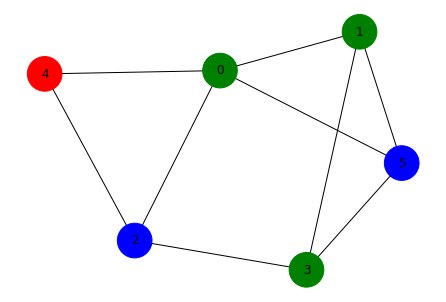

In [ ]:
grafo,cores = cria_grafo_colorido(6)

In [ ]:
grafo,cores

({0: {1: {}, 4: {}, 5: {}, 2: {}},
  1: {0: {}, 3: {}, 5: {}},
  2: {0: {}, 4: {}, 3: {}},
  3: {1: {}, 2: {}, 5: {}},
  4: {0: {}, 2: {}},
  5: {0: {}, 3: {}, 1: {}}},
 ['green', 'green', 'blue', 'green', 'red', 'blue'])

# Testando uma possível função objetivo
  Esta função objetivo conta a quantidade de arestas inválidas para esse problema, ou seja, arestas contendo vertices com cores repetidas.

In [ ]:
def funcao_objetivo(cores,grafo):
  arestas_invalidas = 0
  
  for vertice in grafo.keys():
    for vertice_visinho in grafo[vertice].keys():
      if cores[vertice] == cores[vertice_visinho]:
        arestas_invalidas += 1
    
  return arestas_invalidas

funcao_objetivo(cores,grafo)

4

# Função para gerar n cromossomos
Essa função gera n cromossomos informando o menor valor inteiro a ser gerado, o maior valor inteiro, o tamanho do cromossomo e a quantidade de cromossomos a ser gerados.

In [ ]:
from random import *

def gera_n_cromossomos(inicio_intervalo,fim_intervalo,tam_cromossomo,quantidade):
  cromossomos = []

  for i in range(0,quantidade):
    elementos = []

    for i in range(tam_cromossomo):
      elementos.append(randint(inicio_intervalo,fim_intervalo))

    cromossomos.append(Cromossomo(elementos))
  
  return cromossomos 

# Classe cromossomo
A classe cromossomo é definida tendo um conjunto de elementos sendo candidados a cores de vertices.

A função objetivo precisa receber o grafo informado para calcular quantas atestas são inválidas, para esse problema, queremos zerar a quantidade de arestas inválidas.

In [ ]:
class Cromossomo:
  def __init__(self,elementos):
    self.elementos = elementos
    self.f = 0

  def funcao_objetivo(self,grafo):
    arestas_invalidas = 0
    cores = self.elementos
    
    for vertice in grafo.keys():
      for vertice_visinho in grafo[vertice].keys():
        if cores[vertice] == cores[vertice_visinho]:
          arestas_invalidas += 1

    self.f = arestas_invalidas

  def __lt__(self, cromossomo):
    return cromossomo.f < self.f

  def __str__(self):
    return "Cromossomo ({}), \t funcao objetivo = {}".format(self.elementos,self.f)
  
  def __repr__(self):
    return self.__str__()

# Testando a função objetivo para validar os cromossomos gerados para o grafo gerado

In [ ]:
cromossomos = gera_n_cromossomos(0,2,6,10)

In [ ]:
for cromossomo in cromossomos:
  cromossomo.funcao_objetivo(grafo)
  
cromossomos.sort()
cromossomos

[Cromossomo ([1, 0, 1, 1, 1, 0]), 	 funcao objetivo = 10,
 Cromossomo ([2, 2, 2, 1, 2, 1]), 	 funcao objetivo = 10,
 Cromossomo ([1, 0, 2, 0, 2, 0]), 	 funcao objetivo = 8,
 Cromossomo ([1, 1, 2, 2, 1, 2]), 	 funcao objetivo = 8,
 Cromossomo ([0, 1, 2, 2, 2, 1]), 	 funcao objetivo = 6,
 Cromossomo ([1, 2, 1, 2, 2, 0]), 	 funcao objetivo = 4,
 Cromossomo ([2, 0, 2, 1, 1, 0]), 	 funcao objetivo = 4,
 Cromossomo ([1, 2, 0, 1, 0, 2]), 	 funcao objetivo = 4,
 Cromossomo ([2, 1, 1, 2, 2, 0]), 	 funcao objetivo = 2,
 Cromossomo ([2, 0, 1, 2, 1, 1]), 	 funcao objetivo = 2]

# Funções necessários para o algoritmo
Aqui foram implementadas as funções: 

*   **crossover**: para realizar o crossover de 2 cromossomos, passando como parametro os dois cromossomos e a taxa de crossover.
*   **mutacao**: para realizar a mutação de um cromossomo, passando como parâmetro, o cromossomo e a taxa de mutação.
*   **sorteia**: para realizar um o sorteio do tipo ranking linear, informando como parâmetro o fit acumulado.

In [ ]:
from random import *

def crossover(cromossomo1,cromossomo2,taxa_crossover):
  tam = len(cromossomo1.elementos)

  if(random() < taxa_crossover):
    corte = randint(0,tam-1)
    elementos1 = cromossomo1.elementos.copy()
    elementos2 = cromossomo2.elementos.copy()

    filho1 = Cromossomo(elementos1[:corte]+elementos2[corte:])
    filho2 = Cromossomo(elementos2[:corte]+elementos1[corte:])

    return filho1,filho2

  return cromossomo1,cromossomo2

def mutacao(cromossomo,taxa_mutacao):
  if(random() < taxa_mutacao):
    tam = len(cromossomo.elementos)
    elementos = cromossomo.elementos.copy()

    indice = randint(0,tam-1)
    elementos[indice] = randint(0,2)

    return Cromossomo(elementos)
  return cromossomo


def sorteia(fit_acumulado):
  min = fit_acumulado[0]
  max = fit_acumulado[-1]
  N = len(fit_acumulado)

  num = randint(0,N)
  f = min + (max - min)*(N - num)/(N - 1) 

  for indice,elemento in enumerate(fit_acumulado):
    #print(indice,elemento)
    if f <= elemento:
      return indice
  return N-1

def avalia_populacao(cromossomos,grafo):
  for cromossomo in cromossomos:
      cromossomo.funcao_objetivo(grafo)

In [ ]:
def algoritmo_genetico(grafo,cromossomos,taxa_crossover,taxa_mutacao,qtd_geracao):
  tam = len(cromossomos)
  geracao = 0

  melhores = []
  medias = []
  piores = []
  
  fitness_acumulado = []

  soma = 0
  for i in range(0,tam):
    soma += i
    fitness_acumulado.append(soma)

  nova_geracao = []

  avalia_populacao(cromossomos,grafo)

  while geracao < qtd_geracao:
    nova_geracao = []

    cromossomos.sort()

    for i in range(0,round(tam/2)):
      p1 = cromossomos[sorteia(fitness_acumulado)]
      p2 = cromossomos[sorteia(fitness_acumulado)]

      f1,f2 = crossover(p1,p2,taxa_crossover)
      f1 = mutacao(f1,taxa_mutacao)
      f2 = mutacao(f2,taxa_mutacao)

      nova_geracao.append(f1)
      nova_geracao.append(f2)

    cromossomos = nova_geracao

    avalia_populacao(cromossomos,grafo)

    media = 0

    for cromossomo in cromossomos:
      media += cromossomo.f
    
    media = media/tam

    melhores.append(cromossomos[-1])
    medias.append(media)
    piores.append(cromossomos[0])

    if media == 1:
      break

    geracao += 1

  return piores,melhores,medias,geracao

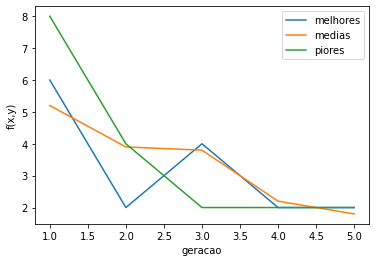

[Cromossomo ([2, 2, 2, 1, 1, 1]), 	 funcao objetivo = 6,
 Cromossomo ([2, 0, 1, 0, 0, 1]), 	 funcao objetivo = 2,
 Cromossomo ([0, 0, 2, 0, 1, 1]), 	 funcao objetivo = 4,
 Cromossomo ([0, 1, 2, 0, 1, 1]), 	 funcao objetivo = 2,
 Cromossomo ([2, 0, 1, 0, 0, 1]), 	 funcao objetivo = 2,
 Cromossomo ([0, 1, 2, 0, 1, 2]), 	 funcao objetivo = 0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import *

cromossomos = gera_n_cromossomos(0,2,6,20)
piores,melhores,medias,geracao = algoritmo_genetico(grafo,cromossomos,0.7,0.03,30)

y_piores,y_melhores,y_medias = [],[],[]

for i in range(0,geracao):
  y_melhores.append(melhores[i].f)
  y_medias.append(medias[i])
  y_piores.append(piores[i].f)

geracoes = np.arange(1, geracao+1, 1)

plt.plot(geracoes,y_melhores,geracoes,y_medias,geracoes,y_piores)
plt.ylabel('f(x,y)')
plt.xlabel('geracao')
plt.legend(['melhores','medias','piores'])
plt.show()

melhores

In [ ]:
def plota_grafo(dicionario,cores):
  color_map = []

  for i in cores:
    if i == 0:
      color_map.append('red')
    elif i == 1:
      color_map.append('green')
    elif i == 2:
      color_map.append('blue')

  Grafo = nx.Graph()

  for vertice in dicionario.keys():
    Grafo.add_node(vertice)

  for vertice in dicionario.keys():
    for vertice_visinho in dicionario[vertice].keys():
      Grafo.add_edge(vertice,vertice_visinho)
  
  nx.draw(Grafo, with_labels=True, node_size=1200,node_color=color_map)    

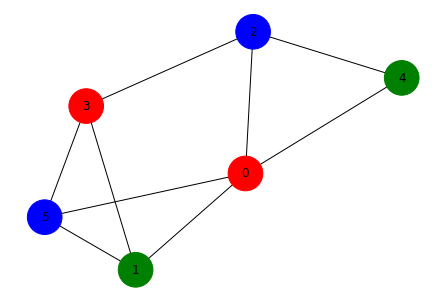

In [ ]:
plota_grafo(grafo,melhores[-1].elementos)